In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurements = Base.classes.measurement

stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurements.date, measurements.prcp, measurements.tobs).\
    filter(measurements.date >= query_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['date','prcp','tobs'])
results_df.set_index('date', inplace=True)

#sanity check
#print(results_df.head(80000))

# Sort the dataframe by date
sorted_df = results_df.sort_values('date')

#sanity check
#sorted_df.head(1000)

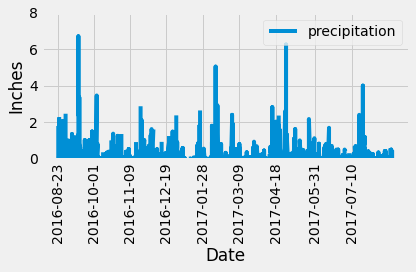

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(sorted_df.index.values, sorted_df['prcp'], label="precipitation")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(sorted_df.index.values[::250], sorted_df.index.values[::250], rotation=90)
plt.ylim(0, 8)
plt.legend(loc="upper right")
plt.tight_layout()

plt.savefig("Images/precipitation.png")

plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

#create a new df without the temp data
precip_df = results_df.drop(columns=['tobs'])

#create a dict with the necessary info
precip_data = {"count":precip_df.count(),
              "mean":precip_df.mean(),
               "std":precip_df.std(),
               "min":precip_df.min(),
               "25%":precip_df.quantile(.25),
               "50%":precip_df.quantile(.50),
               "75%":precip_df.quantile(.75),
               "max":precip_df.max()
              }

#create the dataframe
first_describe_df = pd.DataFrame(precip_data)

#transpose the axis
describe_df = first_describe_df.T

#rename the precipitation column
describe_df = describe_df.rename(columns={"prcp":"precipitation"})

#sanity check
describe_df



,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(stations.station)
stations.count()

9

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_info = session.query(measurements.station, measurements.tobs)

station_df = pd.DataFrame(station_info)

station_df['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_data = session.query(measurements.station, measurements.tobs).\
    filter(measurements.station=='USC00519281')

#create a dataframe to pull the necessary values
most_active_df = pd.DataFrame(most_active_data)
most_active_df.set_index('station')

#find the min, max and avg
min = most_active_df['tobs'].min()
max = most_active_df['tobs'].max()
avg = most_active_df['tobs'].mean()

#print the values
print(f'Lowest temp: {min}')
print(f'Max. temp: {max}')
print(f'Avg. temp: {round(avg, 2)}')

Lowest temp: 54.0
Max. temp: 85.0
Avg. temp: 71.66


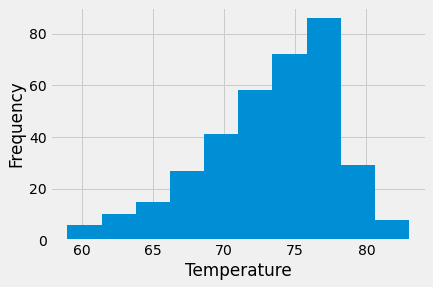

In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_data = session.query(measurements.date, measurements.station, measurements.tobs).\
    filter(measurements.date >= query_date).\
    filter(measurements.station=='USC00519281')

#creating a dataframe to pull data from
last_year_df = pd.DataFrame(last_year_data)

#sanity check
#last_year_df.head()

#store the temp data for the histogram
temp = last_year_df['tobs']

#create the histogram
plt.hist(temp)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.savefig("Images/station-histogram.png")
plt.show()

## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
